## 1. Structure & Guidelines

The most important thing to do is define your problem statement (with your partner). This will be your nexus and will help you choose the dataset. Ideally this is the problem that you work on for the rest of the project. Since this is a big decision, you can change the problem statement and the dataset in the next assignment but no changes after that.

### Where to look for a dataset
There are too many sources for me to name all of them. **Kaggle** is the most popular. To search you can just use google or **Google Dataset Search** specifically. A lot of universities have their datasets available, like the one I use in my example below, which can be a great resource too. 


### EDA Study
Here are some mandatory material to help you get a basic understanding:
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
- https://www.youtube.com/watch?v=9m4n2xVzk9o

The sky is the limit with EDA, use this as a starting point and I expect you to go beyond. For instance I personally love this free book https://jakevdp.github.io/PythonDataScienceHandbook/ that dives deep into data science with python. <br>
This book is entirely in jupyter notebooks for even more code examples: https://allendowney.github.io/ElementsOfDataScience/


### Working with partners
To reiterate, you will decide the problem statement and the dataset together with you partner(s). I encourage you to work on the assignments together, disucss analytical processes and insights. If you are more experienced/knowledgable than your partner, please take the lead and help them understand any difficult concepts. 

**The idea is to foster collaboration and get support on the path to self-suffciency.**<br>
This means your assignment submissions, your final analyses and dashboard has to be completely your own. You should work on those independently. <br>
For example, discussing a specific assignent task is okay but copying your partners answers is not. Attempt to understand from them and write what you know so when I give my feedback it is valuable.

## 2. Assignment Questions/Tasks

1) Discuss & write down a problem statement

- Our focus: "Can social media sentiment improve short-term trading signal accuracy when combined with historical price data?"

2) Find a Dataset(s) that will help you solve your problem

 - We use historical stock CSV files (in `hist/`) and sentiment CSV files from Twitter/X and Reddit. (Sentiment CVS still in progress)

3) EDA Study: Go through the guides I link above and my example to get different perspective of how to approach EDA

4) Start your EDA by emulating the steps I take below and start forming hypotheses about the dataset and getting insights



5) Use 5 more visualizations or techniques of your choice that I dont use below
6) Write down insights about the dataset and how it relates back to your problem!!

## 3. Exploratory Data Analysis

This is the same example from class. I have kept things basic and barebones here so this can serve as a springboard for your analyses. In each step I have added some questions you should ask to get insights into the dataset. The answers to these and other questions that you ask might be through more statistical analysis and visualizations!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 

sns.set(style="whitegrid")

### 1. Data Loading & Quick Overview

In [64]:
def load_stock_data(filepath, date_candidates=["Date", "date", "Datetime", "datetime"], skip_rows=[2]):

    #skip 1st two rows
    df = pd.read_csv(filepath, skiprows=skip_rows)

    #find the date column from candidate names.
    date_col = None
    for candidate in date_candidates:
        if candidate in df.columns:
            date_col = candidate
            break
    if date_col is None:
        # If no candidate is found, assume the first column is date and rename it.
        date_col = df.columns[0]
        df.rename(columns={date_col: 'Date'}, inplace=True)
        date_col = 'Date'
    try:
        pd.to_datetime(df.iloc[0][date_col])
    except Exception as e:
        if str(df.iloc[0][date_col]).strip().lower() == "ticker":
            df = df.drop(df.index[0])

    #parse the date column and set it as the index.
    df[date_col] = pd.to_datetime(df[date_col])
    df.set_index(date_col, inplace=True)
    return df

#usage for stock data
df = load_stock_data("hist/AAPL.csv")

#Convert to numeric values
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove any rows where 'Close' is still NaN after conversion
df.dropna(subset=['Close'], inplace=True)

#Usage for sentiment data (assuming the same structure applies)
#df_sent = load_stock_data("sentiment_AAPL.csv")

#merge datasets on Date (index)
#df = df_price.join(df_sent, how='left')
#df.fillna(0, inplace=True)  # Fill missing sentiment scores with 0

In [65]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2019-12-30,70.655876,70.939453,69.128944,70.156593,144114400
2019-12-31,71.172119,71.179390,70.171127,70.270500,100805600
2020-01-02,72.796028,72.856621,71.545395,71.799881,135480400
2020-01-03,72.088280,72.851746,71.862877,72.020416,146322800
2020-01-06,72.662727,72.701508,70.954017,71.206085,118387200


#### Questions to ponder: 

#### Questions to Ponder:
1. Does the merged data capture both price and sentiment as expected?
2. Are the dates aligned properly between stock prices and sentiment?

    (1 & 2 still need the sentiment data)

3. Is there any immediate sign of missing or inconsistent data?

    No missing data!



### 2. Shape & Features

In [66]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (1258, 5)

Feature Names:
['Close', 'High', 'Low', 'Open', 'Volume']


#### Questions to ponder: 

1. Is the data large enough for the analysis?

    5 years is about the most data we should need

2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed some columns in my dataset below)

    We have to skip the first 3 columns in the proce history since they do not contain data.


In [67]:
#replacing "-" with "_"
df.columns = df.columns.str.replace("-","_")
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [68]:
#Get unique target values
df['Volume'].unique()

array([144114400, 100805600, 135480400, ...,  23234700,  27263000,
        42170447], shape=(1256,))

### 3. Data Types & Missing Values

In [69]:
# understanding the datatypes
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [70]:
# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
- Could missing data be an insight in and of itself?

### 4. Summary Statistics & Outlier Detection

In [71]:
#Summary Stats
df.describe()

,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,152.058150,153.586577,150.350324,151.900105,9.070876e+07
std,42.058615,42.202311,41.830969,41.999211,5.323462e+07
min,54.509758,55.513126,51.652716,55.411089,2.323470e+07
25%,126.664932,128.103238,124.683474,126.294383,5.547532e+07
50%,150.716347,152.555637,148.815768,150.590236,7.635050e+07
75%,176.837841,178.491216,175.415907,176.573461,1.080330e+08
max,259.019989,260.100006,257.630005,258.190002,4.265100e+08


#### Question to ponder
- Did you expect outliers?

    Not really, since market movements can only be so far from the day before.

- Which features have unusually high or low values? What do they tell us about the data?

    Volume! From what I can see, that column has the most disparate values.

- Are there any suspicious patterns or extreme outliers?

    Bad market days see a sharp uptick in volume, always.

- Do we need to drop or transform these outliers?

    No, I believe that volume being an outlier is more of an insight than an interference.

### 5. Univariate Analysis

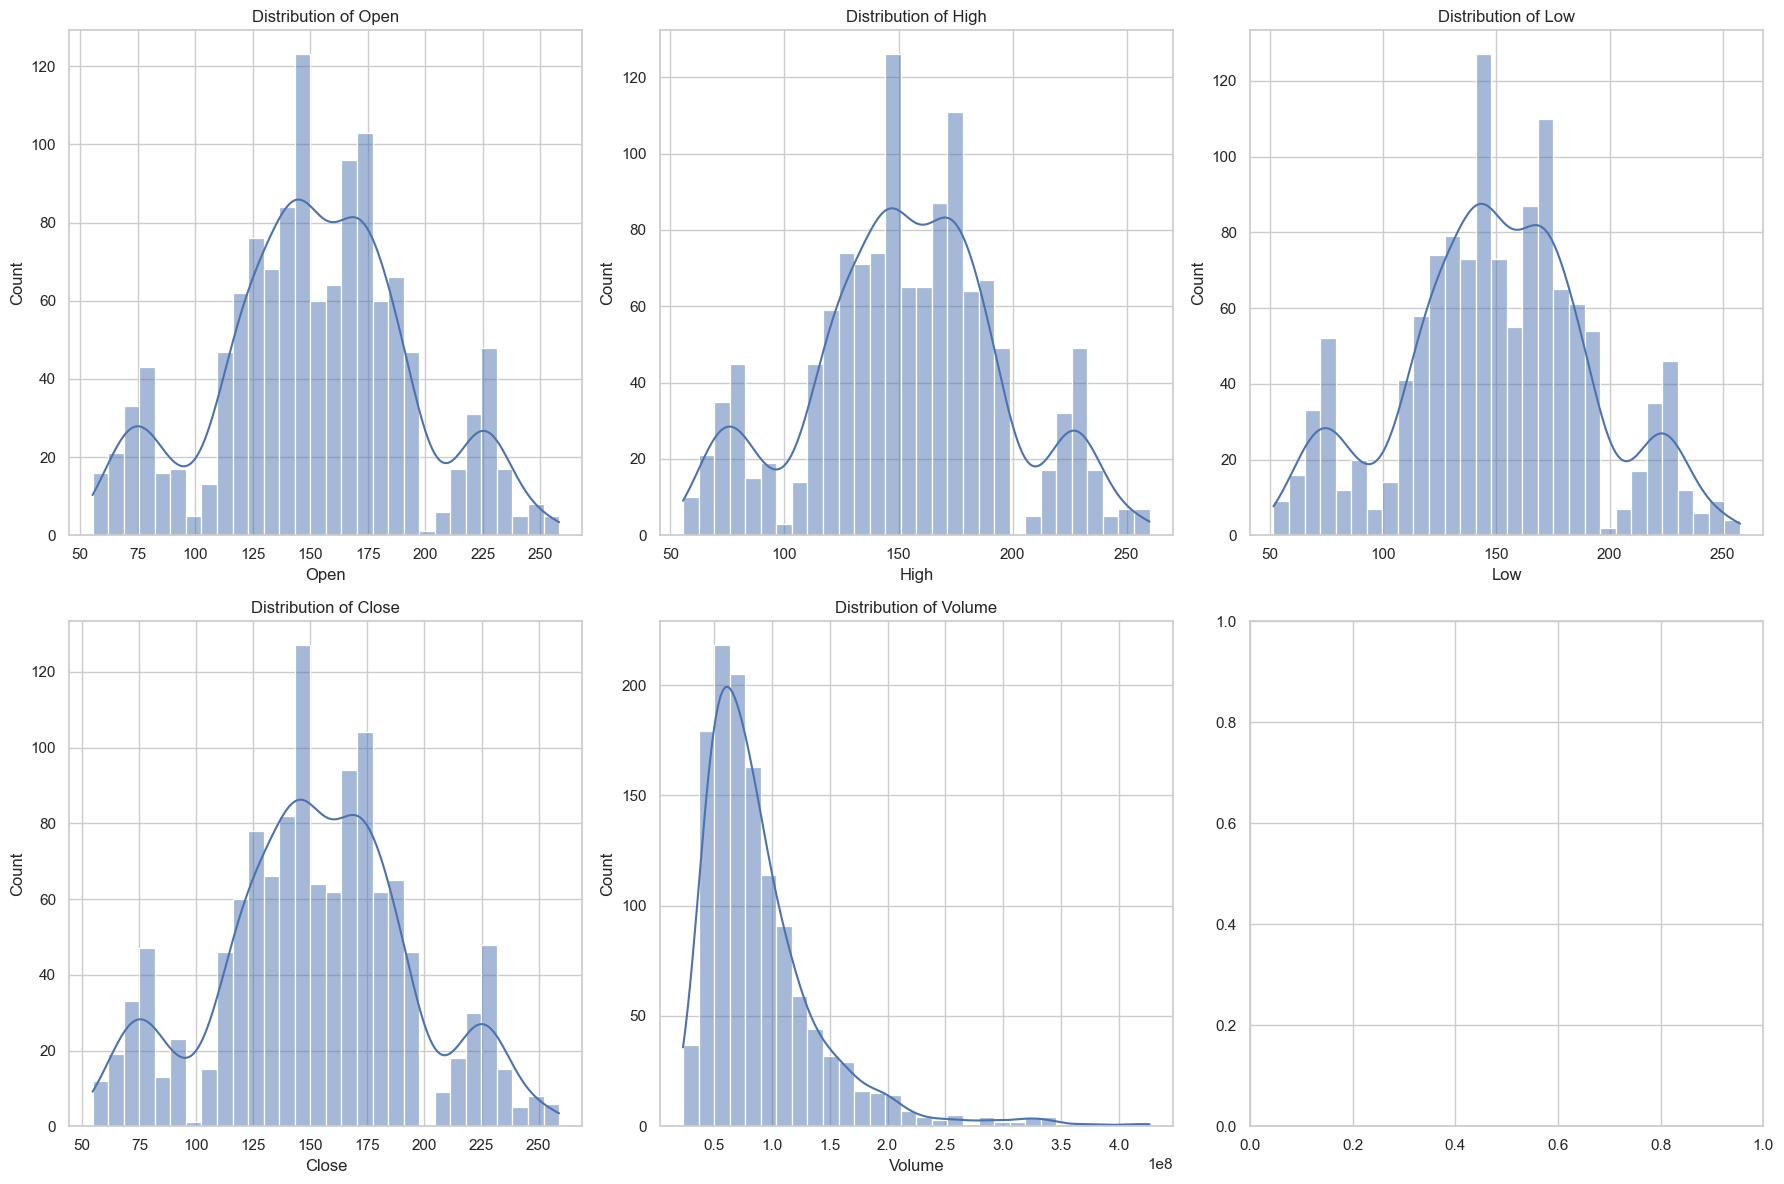

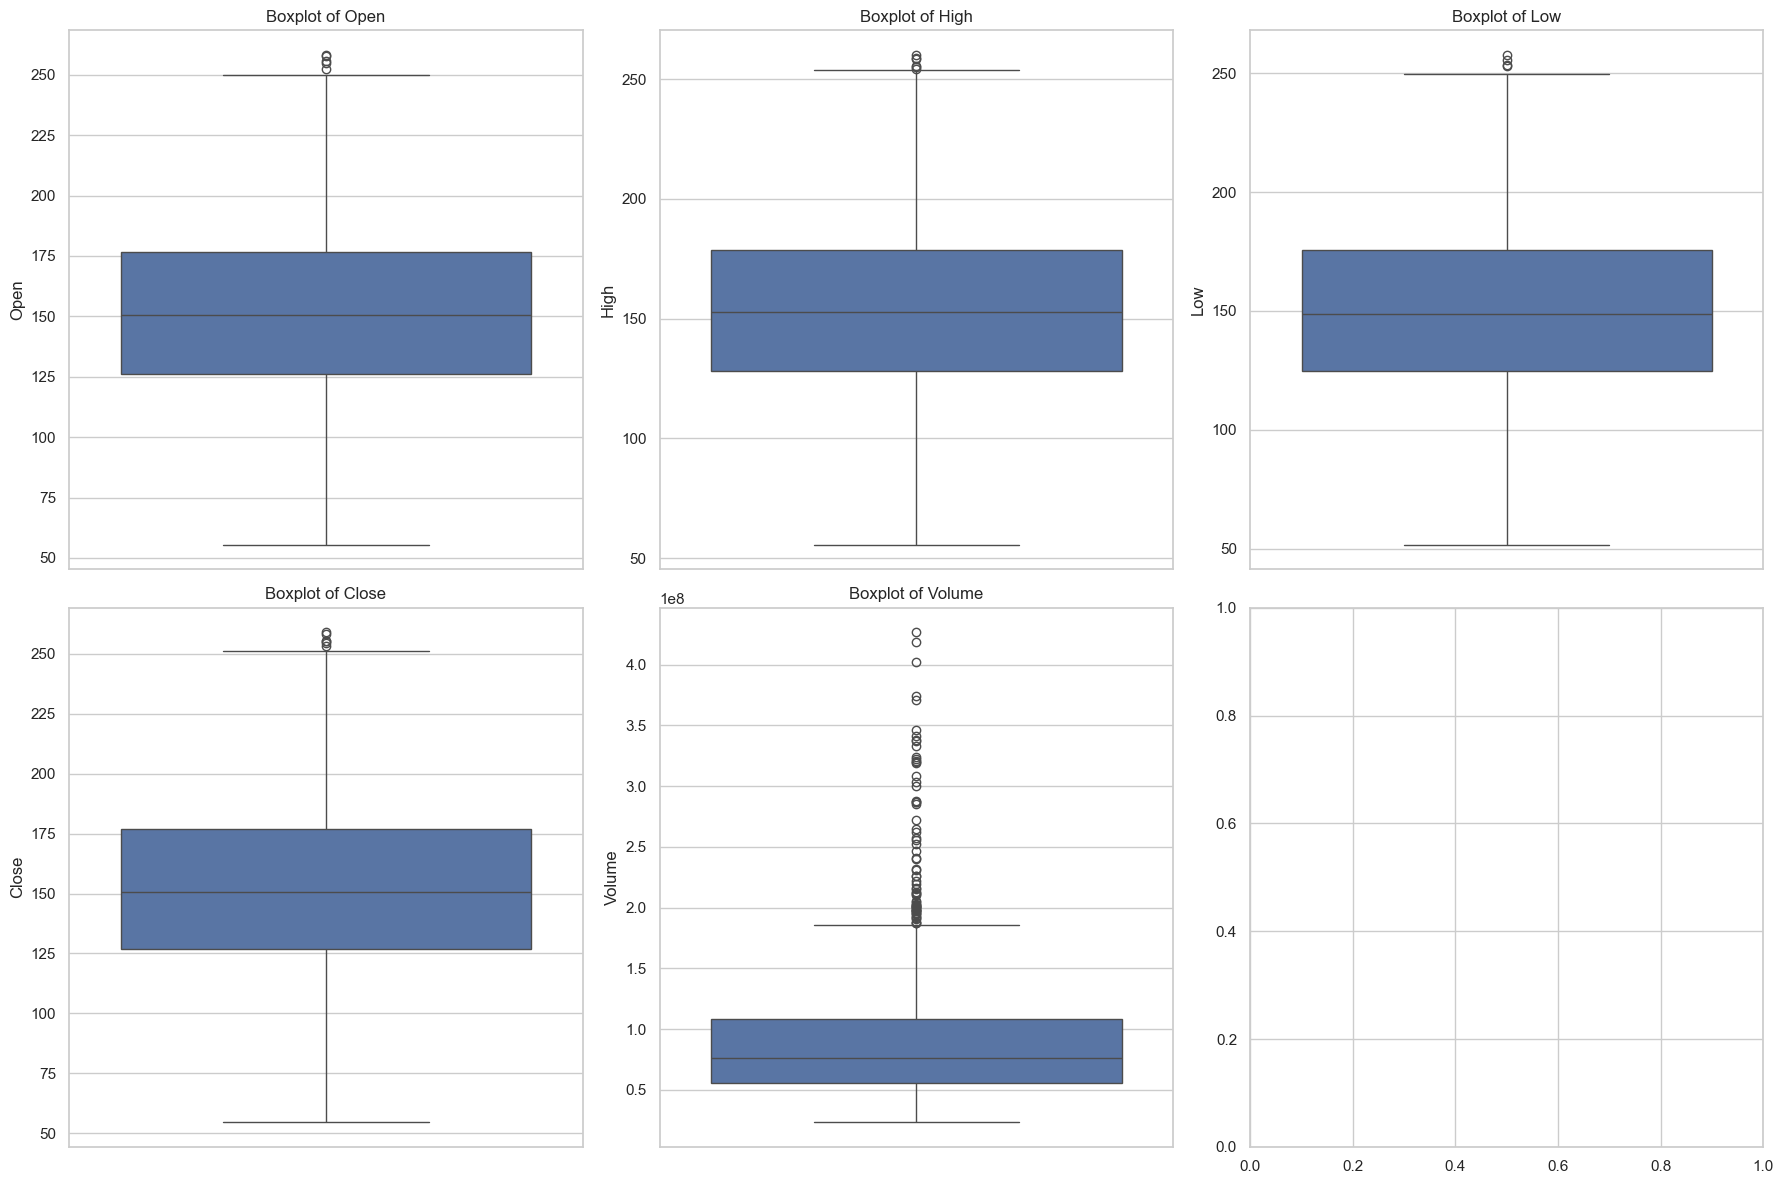

In [60]:

# Define numerical features for visualization
#num_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_score']
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
# Create histograms for numerical features
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, bins=30, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


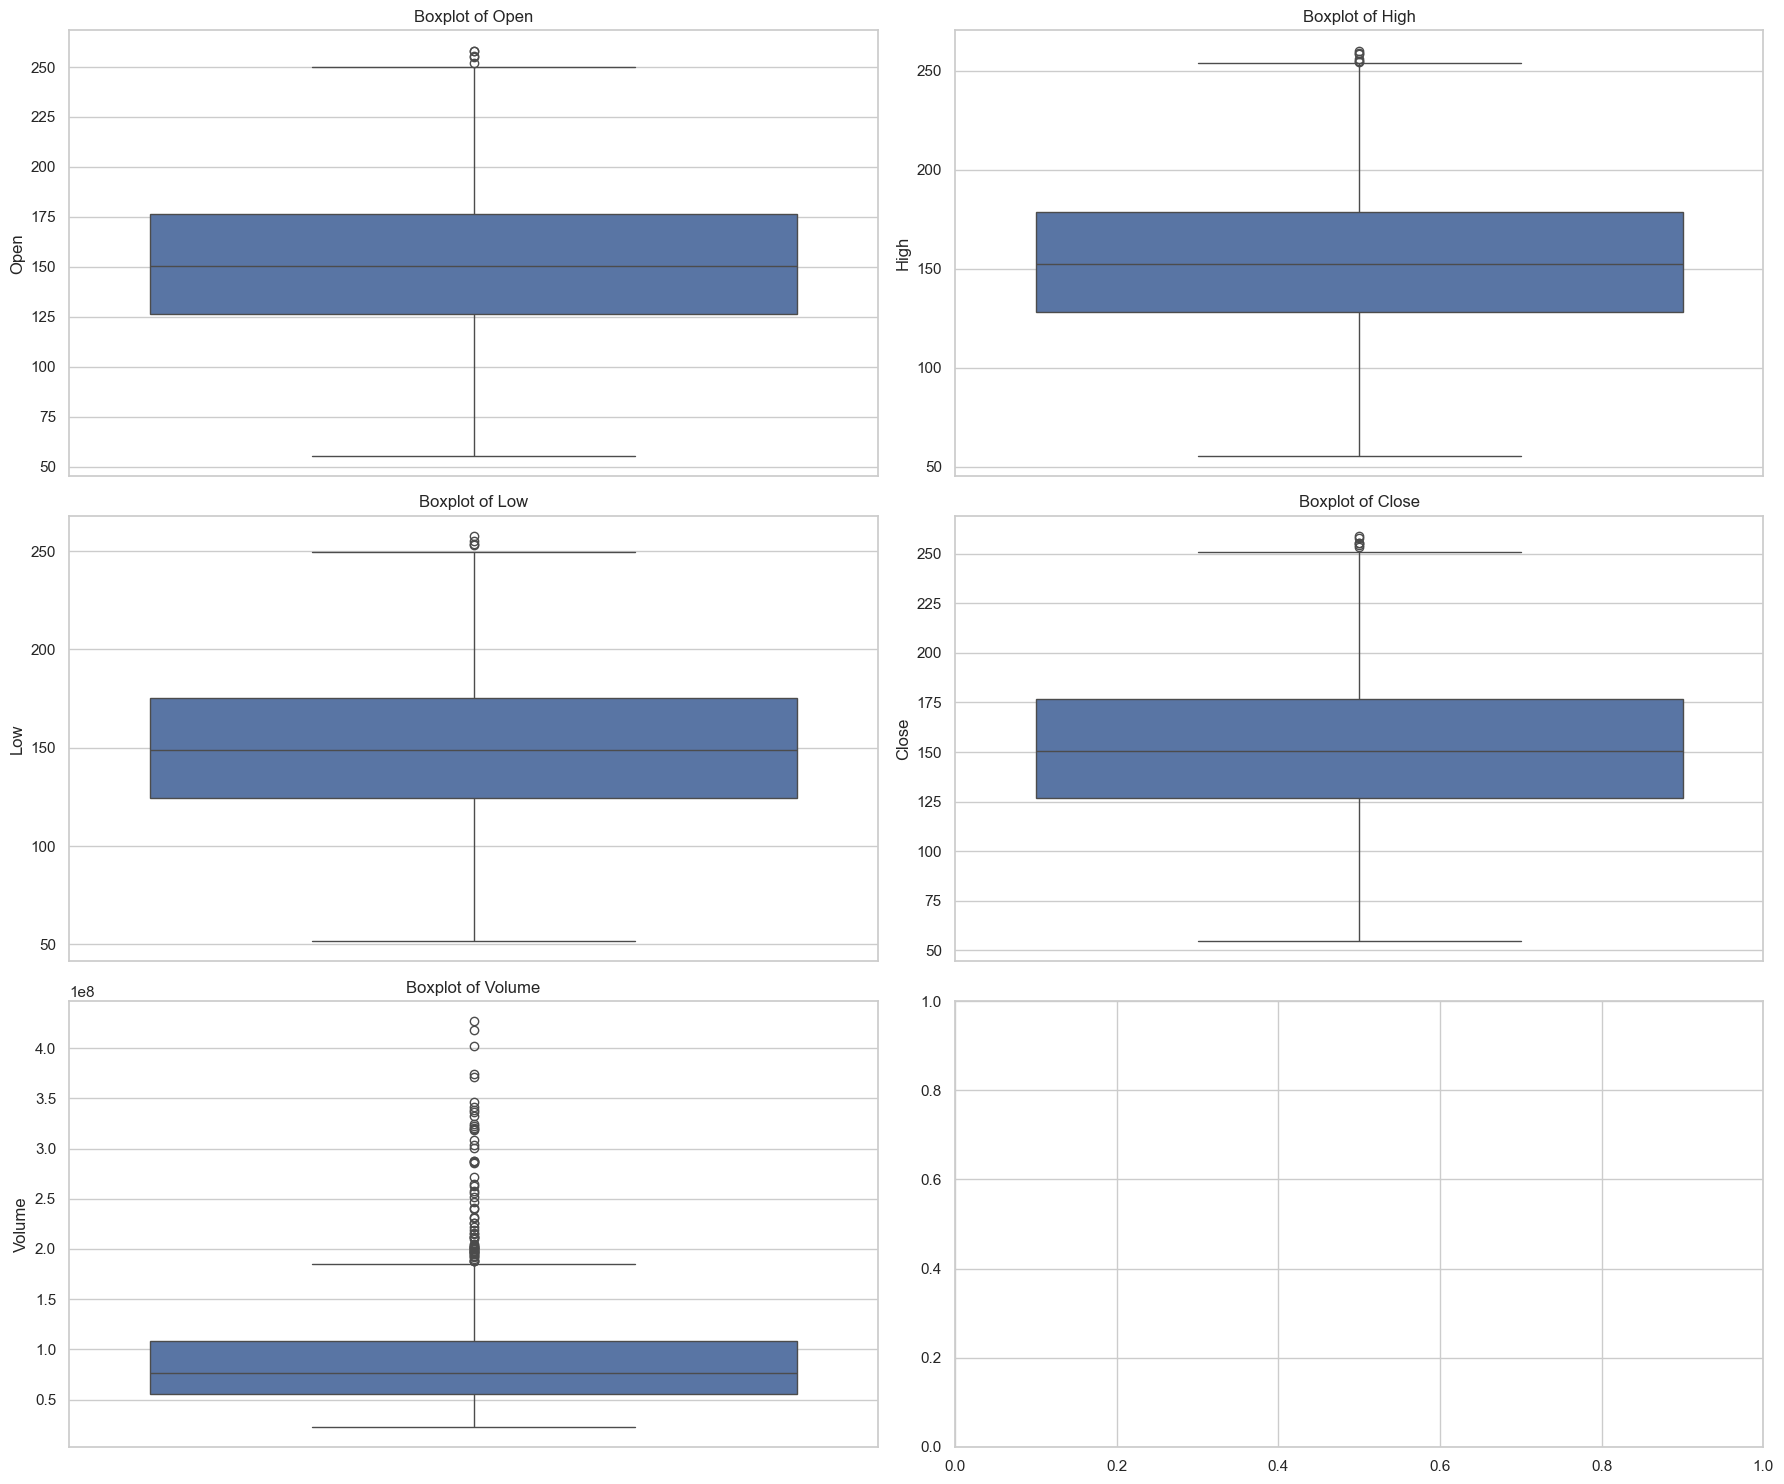

In [59]:
# Create boxplots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


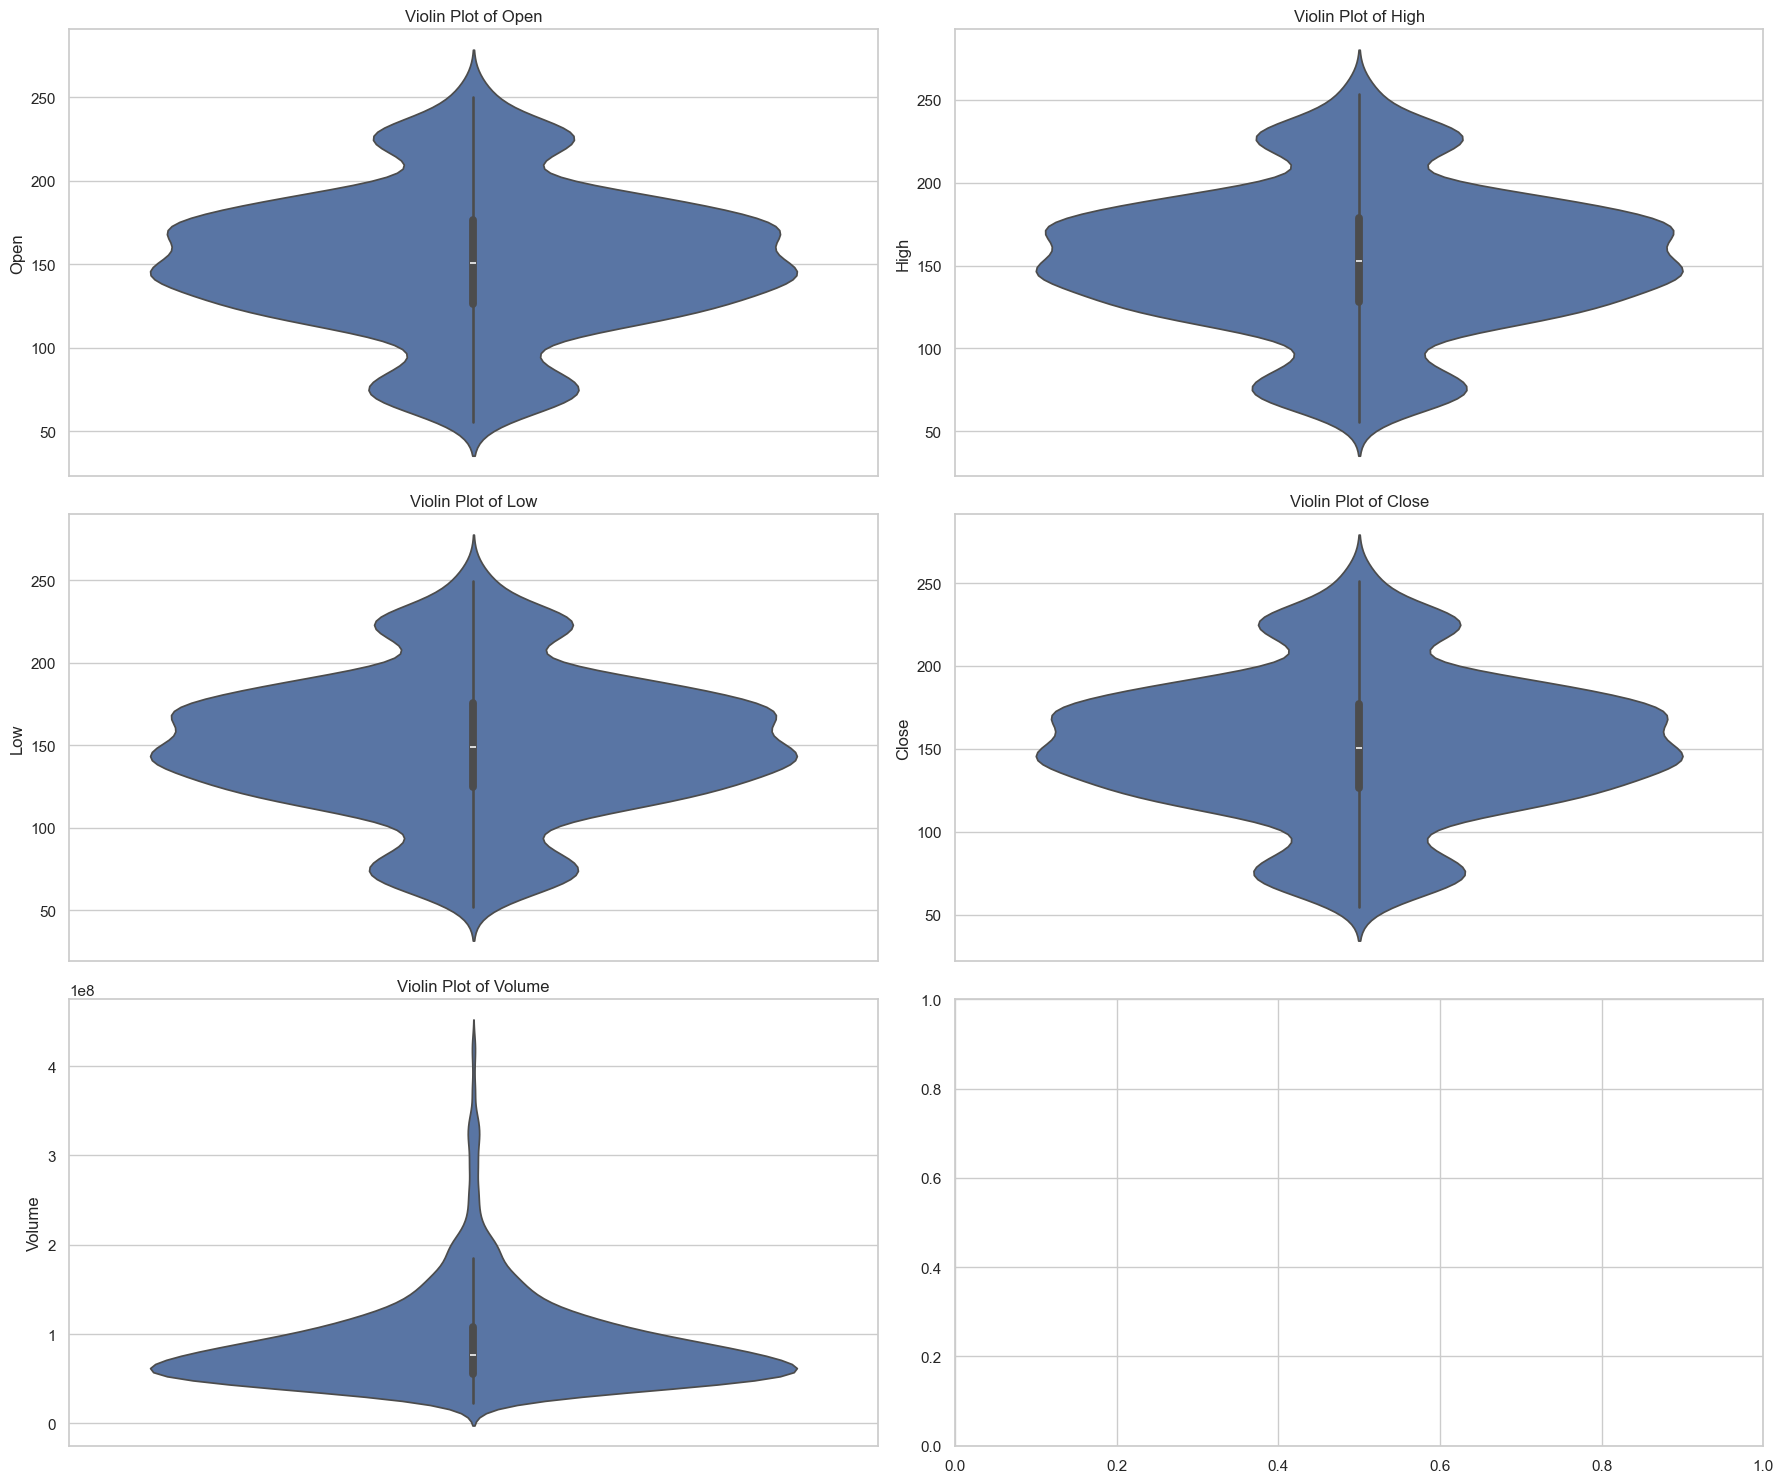

In [58]:
# Create violin plots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.violinplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()


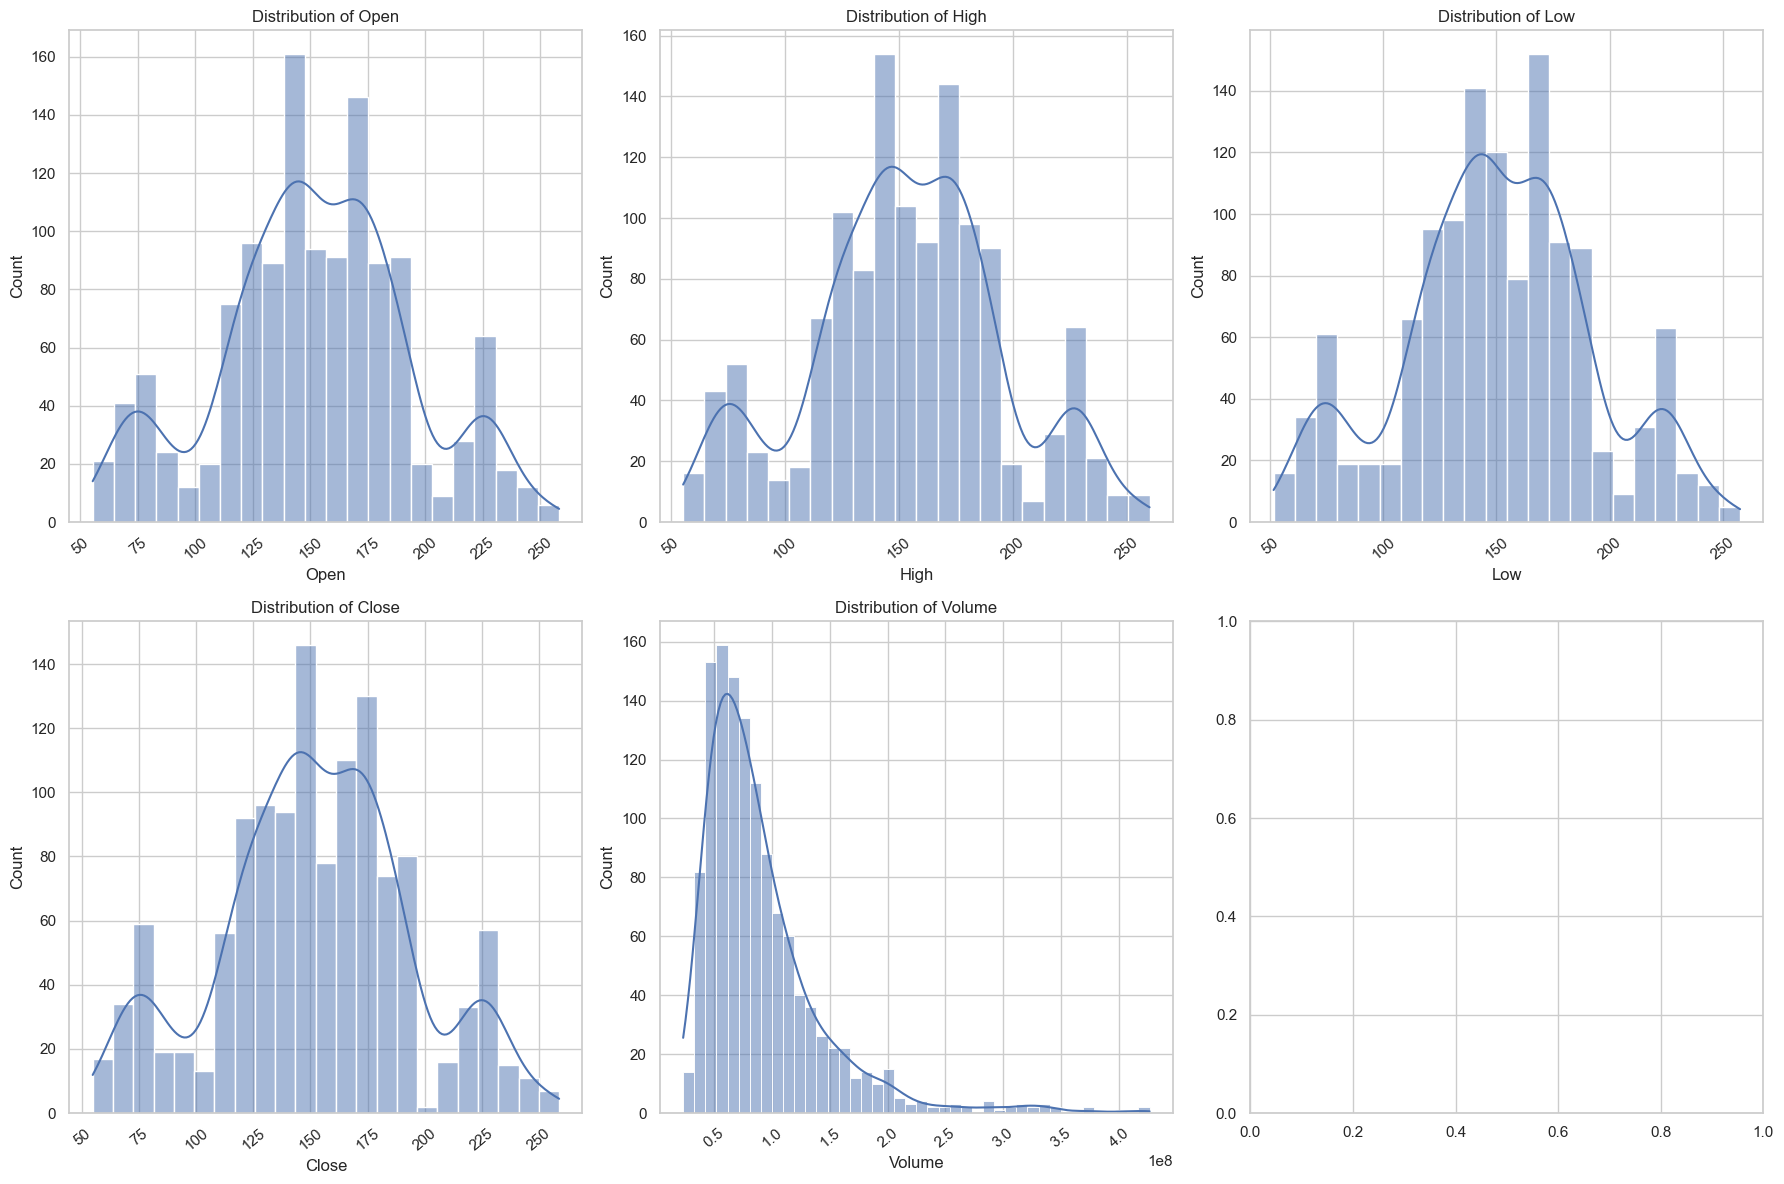

In [57]:
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(data=df, x=feature, kde=True, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    ax[row, col].tick_params(axis='x', rotation=40)

plt.tight_layout()
plt.show()

#### Questions to ponder:

- Are the numerical features skewed or roughly normal?

    The features almost seem too normal since the values are almost all unique but only slightly different from one another.

- Which categories dominate in each categorical feature? What does that tell you about each feature?
    Since our columns are numeric, we don’t have a direct concept of “which category dominates



### 6. Bivariate Analysis

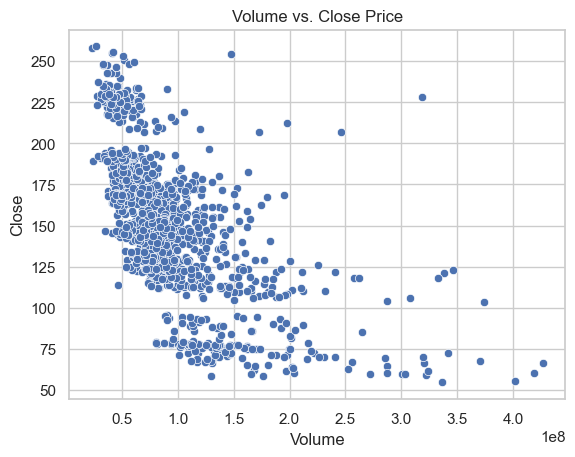

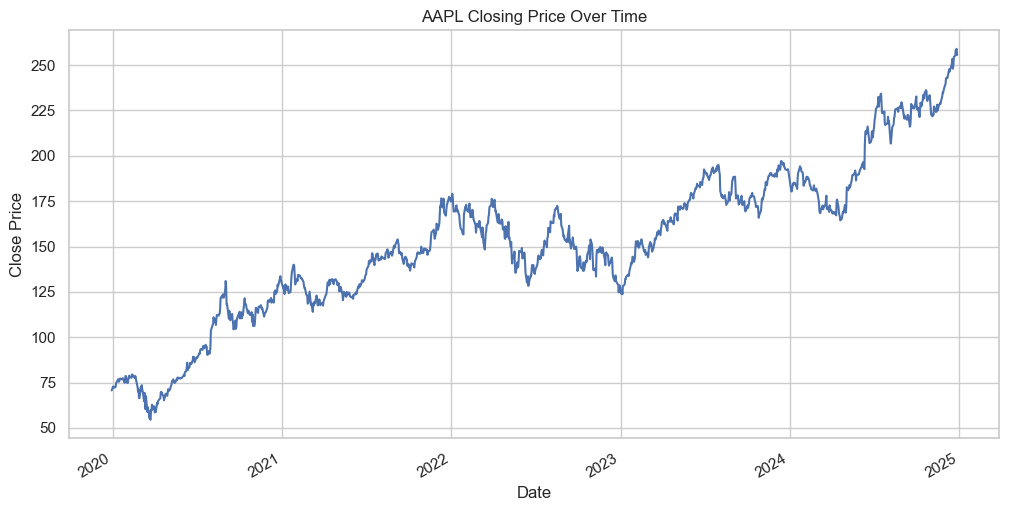

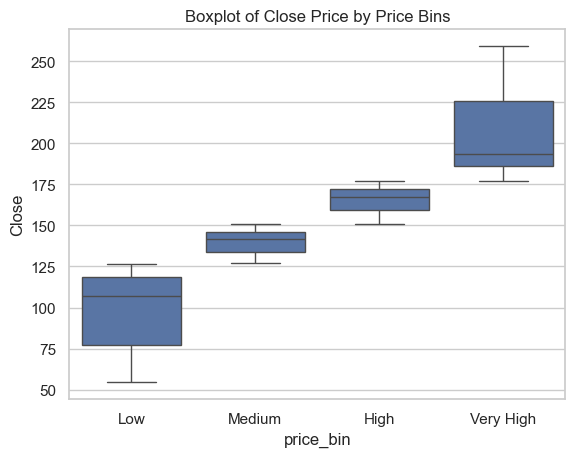

In [56]:
### 6. Bivariate Analysis

# Scatter plot: Volume vs. Close price
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title("Volume vs. Close Price")
plt.show()

# Time series plot: Close price over time
df['Close'].plot(figsize=(12, 6), title="AAPL Closing Price Over Time")
plt.ylabel("Close Price")
plt.show()

# Box plot: Compare Close price across different bins (e.g., quartiles)
df['price_bin'] = pd.qcut(df['Close'], 4, labels=["Low", "Medium", "High", "Very High"])
sns.boxplot(x='price_bin', y='Close', data=df)
plt.title("Boxplot of Close Price by Price Bins")
plt.show()

#### Questions to ponder

- Which numerical features are correlated?

    •	Open, High, Low, and Close prices are highly correlated.

	•	Volume shows a weaker and more scattered relationship with Close price.

- Do certain categories strongly associate with higher or lower numerical values?

    •	The boxplot shows that higher Close price bins have higher median values.

	•	Stocks in the “Very High” price range have the widest variability.

- Any visible clusters or patterns in scatter plots?

    •	Higher volumes tend to appear at lower Close prices.

	•	The scatter plot suggests that volume spikes may not always indicate price increases.
	-
	•	There is some clustering at lower price levels, possibly due to stock splits or specific market phases.

### 7. Multivariate Analysis

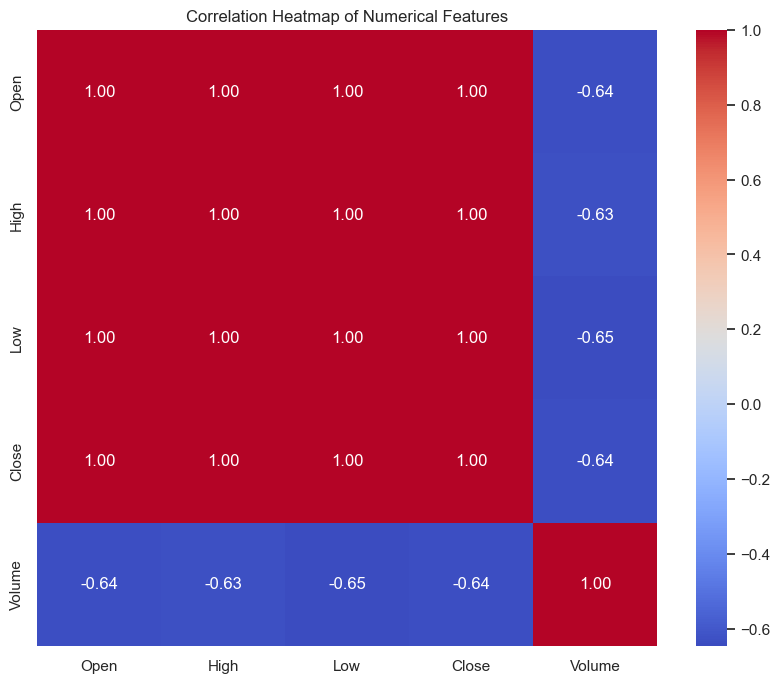

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#### Questions to ponder

- Which features show strong correlation?

    •	Open, High, Low, and Close are highly correlated (1.00).
    -
	•	Volume has a moderate negative correlation (-0.63 to -0.65) with price features.

- Should we remove or combine highly correlated features?

    Since Open, High, Low, and Close are redundant, we can use just one or create technical indicators instead.

- Are there surprising correlations that warrant deeper investigation?

    The negative correlation between Volume and price suggests that higher trading activity is often associated with price drops.

### 8. Next Steps

- Which features appear most important for the problem?

    Close price is key for trend analysis, while Volume helps understand market participation.

- What data cleaning or transformation steps remain?

    Considering normalizing Volume to match price scales, as well as feature engineering indicators such as Moving Averages.

- How will these insights guide the next phase (modeling, reporting, or business decisions)?

    Feature selection or PCA may help reduce redundancy in correlated features.

## Resources
- Another amazing free book I have used : https://greenteapress.com/thinkstats/thinkstats.pdf
- https://towardsdatascience.com/data-science-101-life-cycle-of-a-data-science-project-86cbc4a2f7f0/